In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import LinearSegmentedColormap


In [9]:
# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

In [11]:
df = pd.read_csv("../1_datasets/final_datasets/final_sdi_pm25_gbd.csv")
df.head()

,Country,cause,Risk-Exposure-Impact,Year,DALY Val,upper,lower,SDI_mean_value,Population Category,PM25 concentration (µg/m³),PM25 lower bound,PM25 upper bound
0,China,Stroke,Ambient particulate matter pollution,2013,927.721590,1208.913876,564.490209,0.663103,Total,64.93,61.43,67.88
1,Democratic People's Republic of Korea,Stroke,Ambient particulate matter pollution,2014,960.571587,1227.910165,589.905594,0.553604,Total,60.09,45.31,77.31
2,Cambodia,Stroke,Ambient particulate matter pollution,2017,945.157096,1206.731114,601.287022,0.451222,Total,16.84,14.88,19.48
3,Indonesia,Stroke,Ambient particulate matter pollution,2018,909.881906,1175.832907,570.912093,0.640949,Total,18.47,15.58,22.90
4,Lao People's Democratic Republic,Stroke,Ambient particulate matter pollution,2019,884.162698,1132.470448,582.014559,0.478811,Total,21.15,16.86,25.13


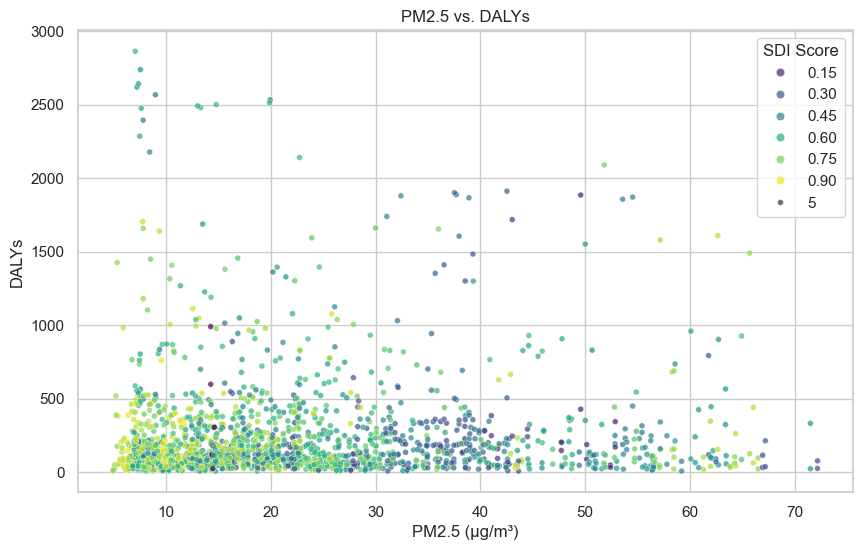

In [12]:

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, 
                   x='PM25 concentration (µg/m³)', 
                   y='DALY Val',
                   hue='SDI_mean_value',
                   palette='viridis',
                   size=5,  # Fixed size
                   alpha=0.7)
    
    plt.title('PM2.5 vs. DALYs')
    plt.xlabel('PM2.5 (µg/m³)')
    plt.ylabel('DALYs')
    plt.legend(title='SDI Score')
    plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_9196\2405686186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="SDI Group", y="PM25 concentration (µg/m³)", palette="Blues")


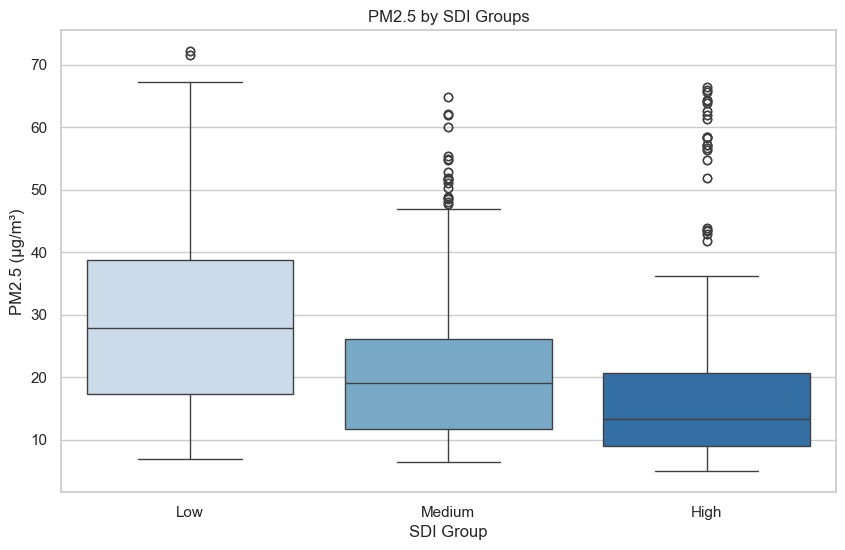

In [15]:

    df["SDI Group"] = pd.qcut(
        df["SDI_mean_value"], 3, labels=["Low", "Medium", "High"]
    )

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x="SDI Group", y="PM25 concentration (µg/m³)", palette="Blues")

    plt.title("PM2.5 by SDI Groups")
    plt.xlabel("SDI Group")
    plt.ylabel("PM2.5 (µg/m³)")
    plt.show()


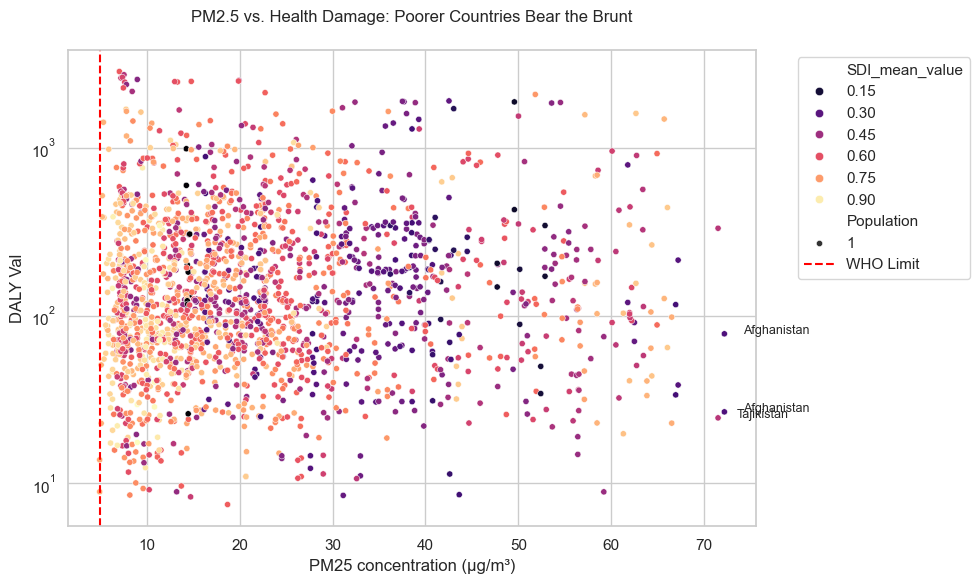

In [24]:
df["Population"] = 1  # dummy value to avoid size error

plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    x="PM25 concentration (µg/m³)",
    y="DALY Val",
    hue="SDI_mean_value",
    data=df,
    palette="magma",  # Better for visibility
    size="Population",  # If you have pop data
    sizes=(20, 400),
)

# Add WHO safety line
plt.axvline(x=5, color="red", linestyle="--", label="WHO Limit")

# Label outliers
for i, row in df.nlargest(3, "PM25 concentration (µg/m³)").iterrows():
    ax.text(
        row["PM25 concentration (µg/m³)"] + 2,
        row["DALY Val"],
        row["Country"],
        fontsize=9,
        ha="left",
    )

plt.yscale("log")
plt.title("PM2.5 vs. Health Damage: Poorer Countries Bear the Brunt", pad=20)
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()


C:\Users\Dell\AppData\Local\Temp\ipykernel_9196\1070075729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="cause", y="DALY Val", palette="rocket")


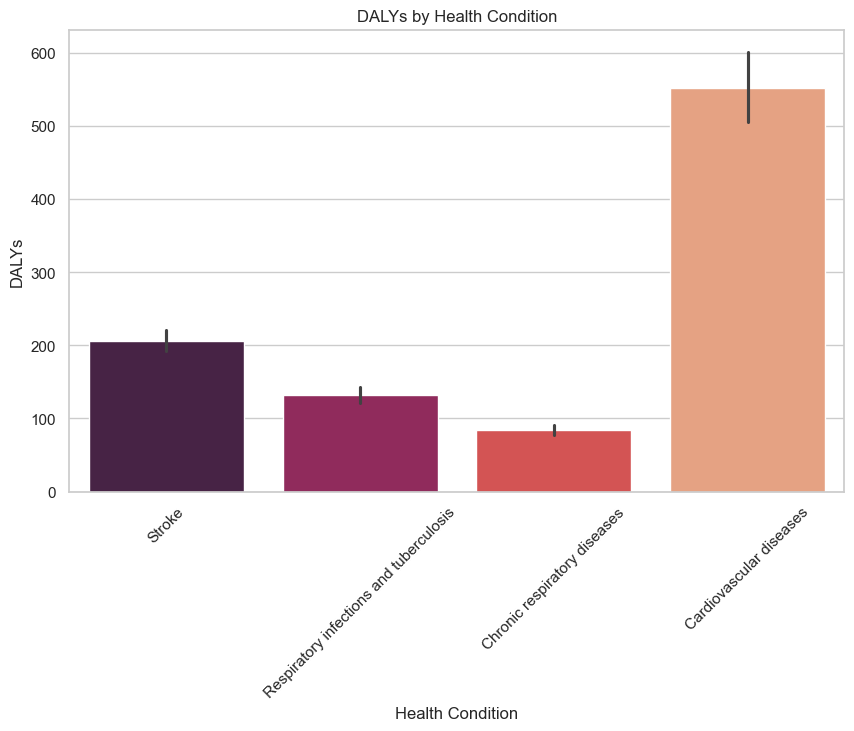

In [17]:

    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, x="cause", y="DALY Val", palette="rocket")

    plt.title("DALYs by Health Condition")
    plt.xlabel("Health Condition")
    plt.ylabel("DALYs")
    plt.xticks(rotation=45)
    plt.show()


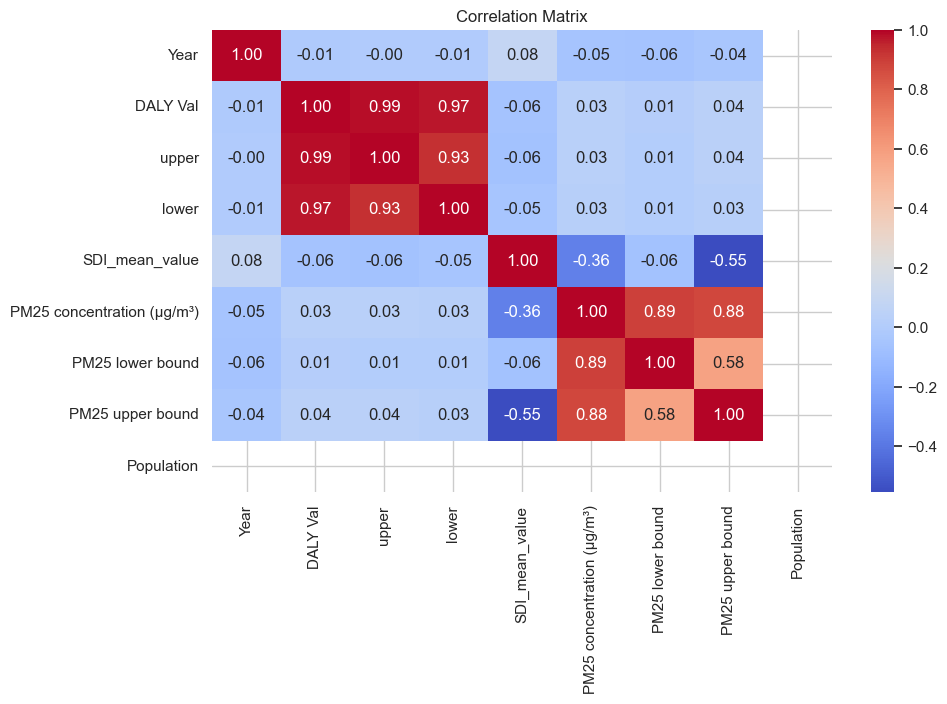

In [26]:
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

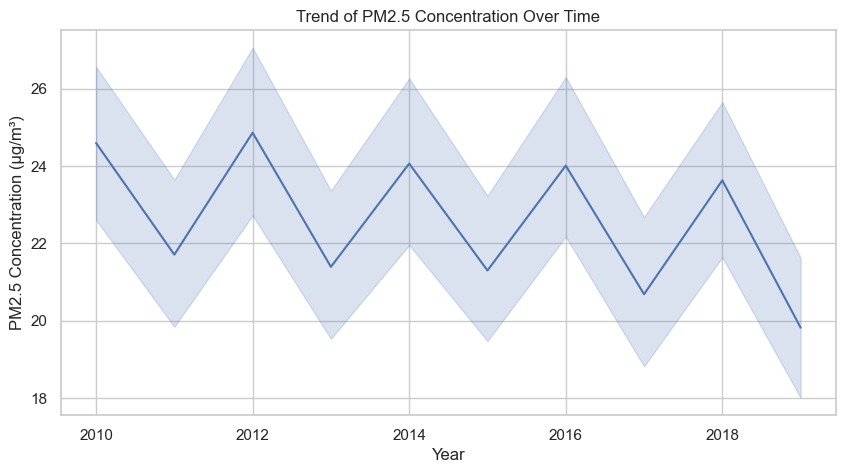

In [27]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Year", y="PM25 concentration (µg/m³)")
plt.title("Trend of PM2.5 Concentration Over Time")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.grid(True)
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_9196\782507740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


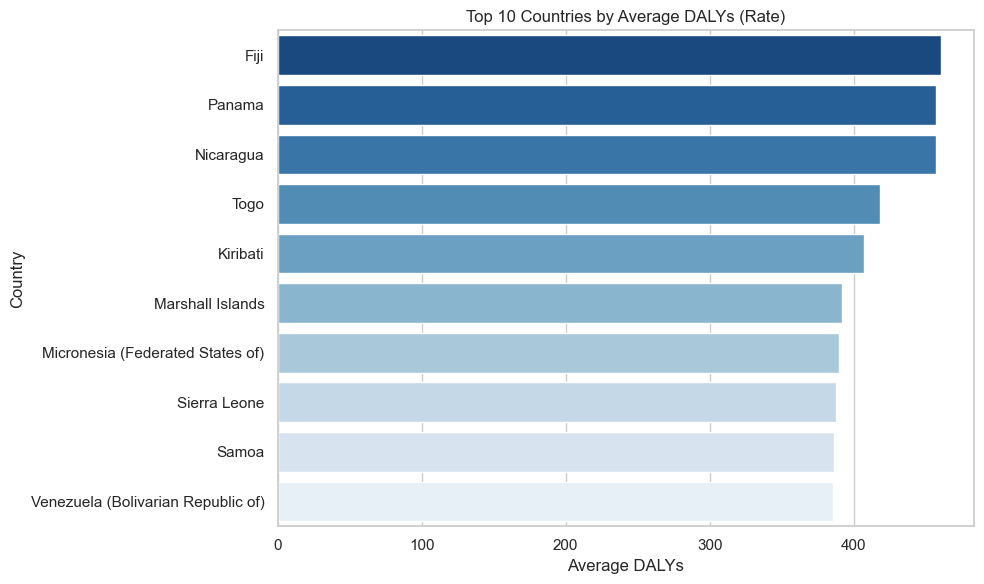

In [31]:
country_dalys = df.groupby("Country")["DALY Val"].mean().sort_values(ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_dalys.head(10).values, y=country_dalys.head(10).index, palette="Blues_r"
)
plt.title("Top 10 Countries by Average DALYs (Rate)")
plt.xlabel("Average DALYs")
plt.tight_layout()
plt.show()
